In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
df_mall = pd.read_csv('customers.csv', index_col = 'CustomerID')

In [24]:
# binarizing 'gender' column

df_mall['Gender'] = df_mall['Gender'].map({'Female': 0, 'Male': 1})

In [25]:
# normalize spending score

scaler = MinMaxScaler()
df_mall['Spending_Score'] = df_mall['Spending_Score']/100

In [29]:
# define number of clusters

k = 4

# init the model

kmeans = KMeans(n_clusters=k, random_state=42)

# fit the model to the data

kmeans.fit(df_mall)

# get the cluster labels

cluster_labels = kmeans.labels_

# add labels to the df

df_mall['Cluster'] = cluster_labels

C:\Users\jakubk\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jakubk\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


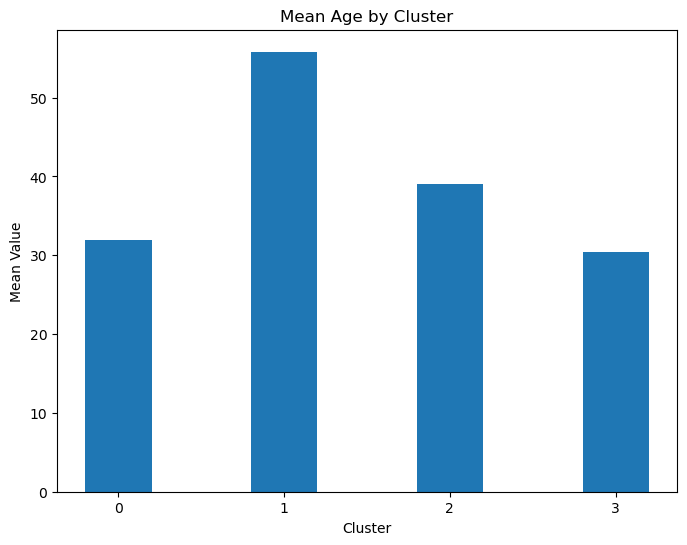

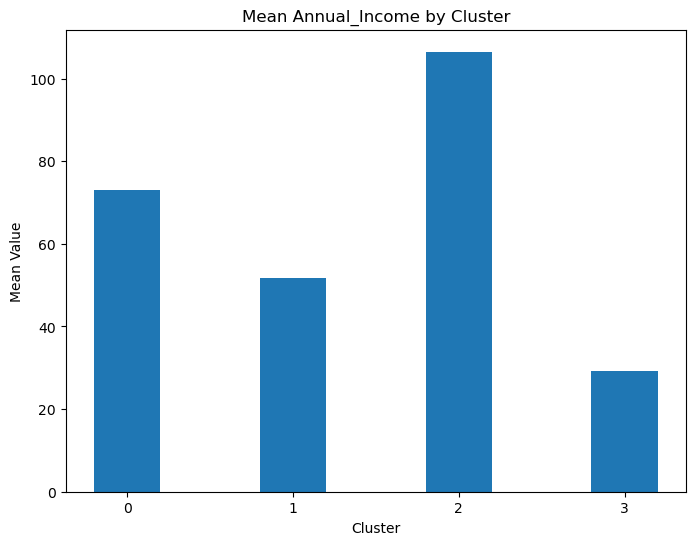

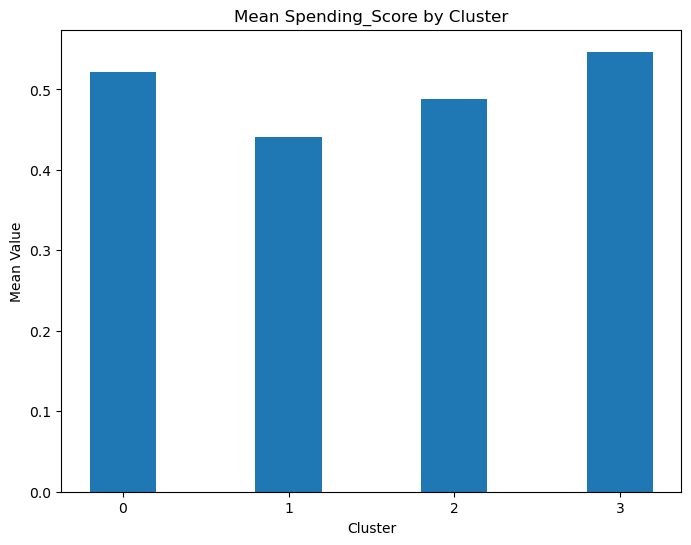

In [41]:
# plot the mean values for each cluster


mean_values = df_mall.groupby('Cluster').mean()

for feature in mean_values.columns:
    if feature == 'Gender':
        continue
    else:
        fig, ax = plt.subplots(figsize=(8, 6))
        x = np.arange(len(mean_values))
        width = 0.4

        ax.bar(x, mean_values[feature], width=width)
        ax.set_xticks(x)
        ax.set_xticklabels(mean_values.index)
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Mean Value')
        ax.set_title(f'Mean {feature} by Cluster')

        plt.show()

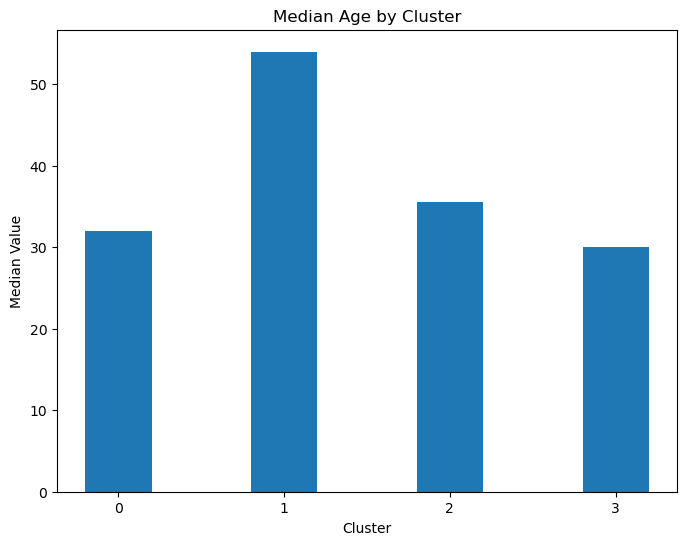

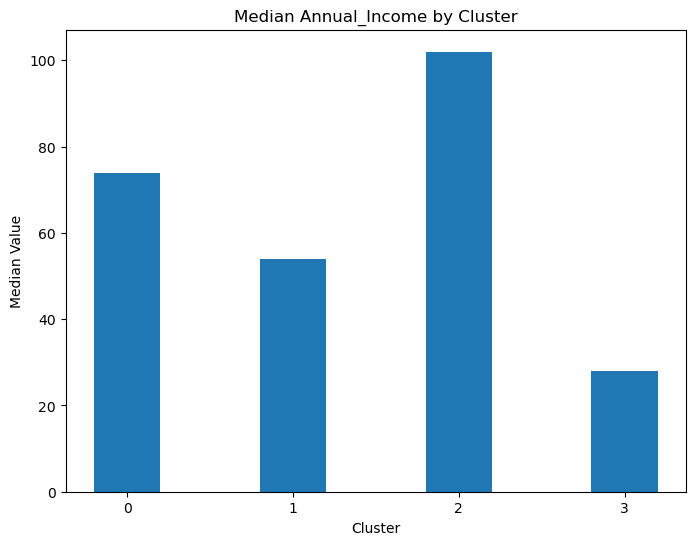

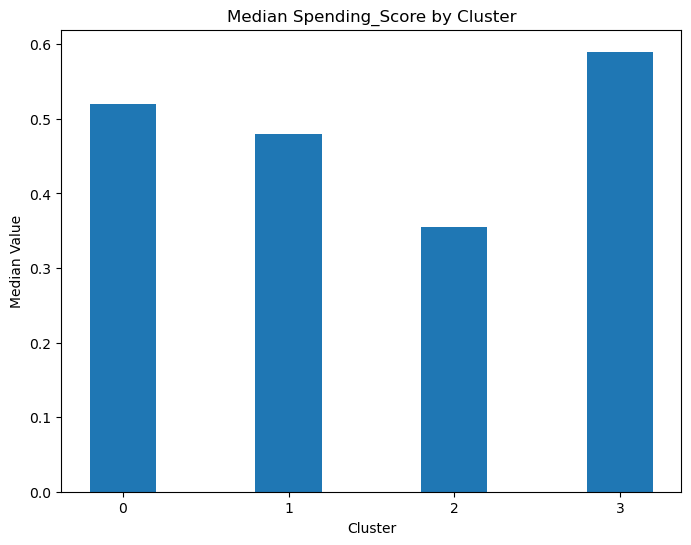

In [43]:
# plot the median as well

median_values = df_mall.groupby('Cluster').median()

for feature in mean_values.columns:
    if feature == 'Gender':
        continue
    else:
        fig, ax = plt.subplots(figsize=(8, 6))
        x = np.arange(len(mean_values))
        width = 0.4

        ax.bar(x, median_values[feature], width=width)
        ax.set_xticks(x)
        ax.set_xticklabels(median_values.index)
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Median Value')
        ax.set_title(f'Median {feature} by Cluster')

        plt.show()

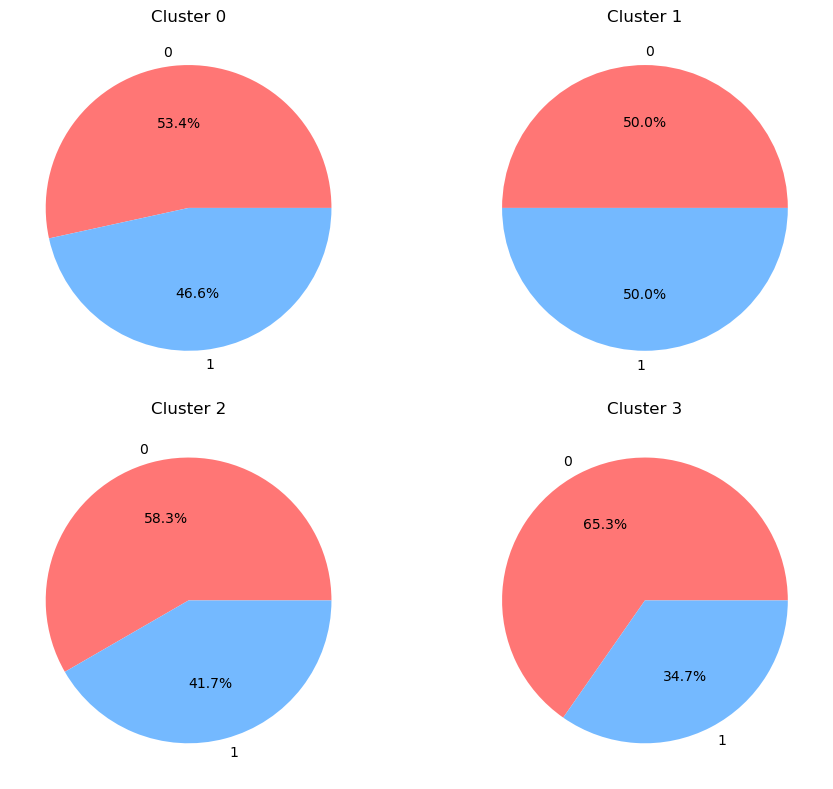

In [42]:
# check the gender proportion in every cluster

gender_proportion = df_mall.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)
colors = ['#FF7675', '#74B9FF']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, ax in enumerate(axs):
    cluster_data = gender_proportion.loc[i]
    ax.pie(cluster_data, labels=cluster_data.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()